In [1]:
# ths notebook creates Gaussian data with eigenvalues of choice
import numpy as np
import os
import pickle as pkl
import sys
sys.path.append('../bin/')
from load_data import *
from estimate_covariance import *
from scipy.stats import ortho_group
import scipy.linalg as lg
import matplotlib.pyplot as plt

In [3]:
num_classes= 2
data_nums  = [50,90,100,200,400,1000]
data_dim   = 100
scaling    = 'exp' #scaling of eigenvalues
mode       = 'train'
tag        = 'Gaussian'
outpath    = '../data/%s/'%tag
same_R     = True

if not os.path.isdir(outpath):
    os.makedirs(outpath)

In [4]:
def create_Gaussian_data(eigs, means, data_num, rand_seed, random_state=49):
    data_dim = len(eigs)
    R    = ortho_group.rvs(data_dim,random_state=random_state)
    cov  = np.dot(np.dot(R.T,np.diag(eigs)),R)
    L    = lg.cholesky(cov,lower=True)
    np.random.seed(rand_seed) #make sure same class has same data for different data_nums
    data = np.random.randn((data_dim*data_num)).reshape((data_num, data_dim))
    data = np.einsum('ij,kj->ki',L,data)+means
    return data, cov

In [5]:
def make_data(data_dim, data_num, num_classes, scaling, mode, fac=1.1, same_R=True):
    covs=[]
    data=[]
    means=[]
    for ii in range(num_classes):
        print(ii)
        if scaling=='lin':
            eigs = np.linspace(1,data_dim,data_dim)*(fac**(ii+1))
            cond_num = max(eigs)/min(eigs)
        elif scaling=='exp':
            eigs = np.exp(np.linspace(-10,data_dim/10.,data_dim))*(fac**(ii+1))
            cond_num = max(eigs)/min(eigs)
        else:
            raise ValueError('choose either lin or exp for scaling')
        plt.plot(eigs)

        mean_eig = np.mean(np.sqrt(eigs))
        print(mean_eig)
        mean = (np.random.random(data_dim)*mean_eig)-mean_eig/2.
        
        if same_R:
            random_state=49
        else:
            random_state=(49/(ii+1))**(ii+1/2.)
        
        if mode == 'train':
            d, c = create_Gaussian_data(eigs, mean, data_num, rand_seed=ii+1, random_state=random_state)
        if mode == 'test':
            d, c = create_Gaussian_data(eigs, mean, data_num, rand_seed=(ii+1)*453,random_state=random_state)
        
        data.append(d)
        covs.append(c)
        means.append(mean)
    plt.show()    
    return data, covs, means
    
    
    

../data/Gaussian/Gaussian_sameR_scaling_exp_dim100_num50_train.pkl
0
16.2007669237
1
16.9915076968


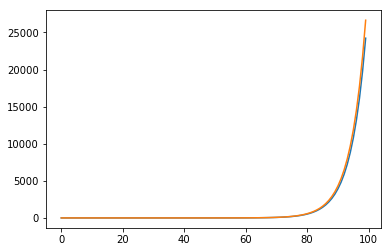

../data/Gaussian/Gaussian_sameR_scaling_exp_dim100_num90_train.pkl
0
16.2007669237
1
16.9915076968


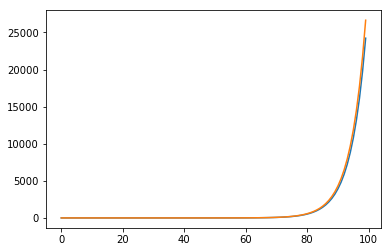

../data/Gaussian/Gaussian_sameR_scaling_exp_dim100_num100_train.pkl
0
16.2007669237
1
16.9915076968


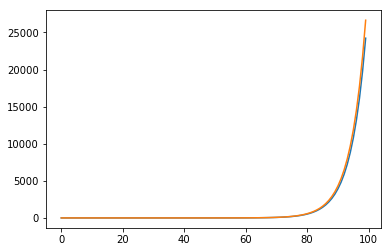

../data/Gaussian/Gaussian_sameR_scaling_exp_dim100_num200_train.pkl
0
16.2007669237
1
16.9915076968


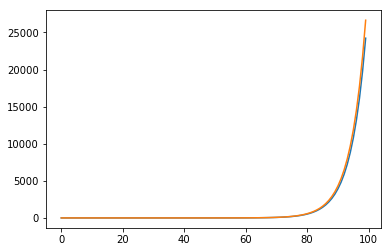

../data/Gaussian/Gaussian_sameR_scaling_exp_dim100_num400_train.pkl
0
16.2007669237
1
16.9915076968


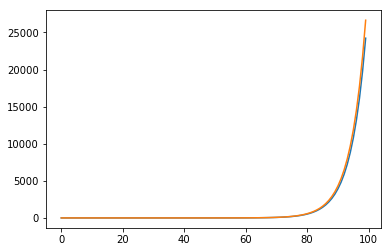

../data/Gaussian/Gaussian_sameR_scaling_exp_dim100_num1000_train.pkl
0
16.2007669237
1
16.9915076968


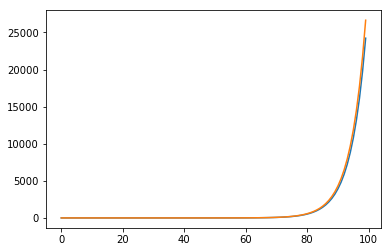

In [154]:
for data_num in data_nums:
    if same_R:
        outfile    = '%s_sameR_scaling_%s_dim%d_num%d_%s.pkl'%(tag,scaling,data_dim, data_num, mode)
    else:
        outfile    = '%s_scaling_%s_dim%d_num%d_%s.pkl'%(tag,scaling,data_dim, data_num, mode)

    outfile    = os.path.join(outpath,outfile)
    print(outfile)
    data, covs, means = make_data(data_dim, data_num, num_classes, scaling=scaling,mode=mode,fac=1.1, same_R=same_R)
    if not os.path.isfile(outfile):
        pkl.dump([np.asarray(data),covs, means],open(outfile,'wb'))

In [155]:
np.asarray(data).shape

(2, 1000, 100)

In [8]:
# if same_R:
#     infile    = '%s_sameR_scaling_%s_dim%d'%(tag,scaling,data_dim)
# else:
#     infile    = '%s_scaling_%s_dim%d'%(tag,scaling,data_dim)
# infile    = os.path.join(outpath,infile)
# load_Gaussian_data(infile,200,200)

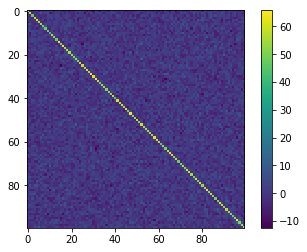

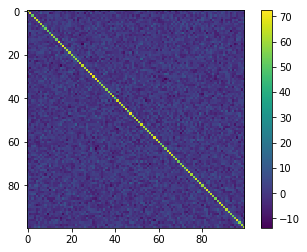

In [142]:
for cov in covs:
    plt.imshow(cov)
    plt.colorbar()
    plt.show()